In [1]:
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install dowhy
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4 pkg-config
0 upgraded, 10 newly installed, 2 to remove and 30 not upgraded.
Need to get 2,482 kB of archives.
After this operation, 7,671 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config a

In [2]:
import pandas as pd
from dowhy import CausalModel
import dowhy.datasets
import numpy as np
import pygraphviz
from IPython.display import Image,display
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import files

# Upload file manually
uploaded = files.upload()

Saving correlation_data1.csv to correlation_data1.csv


In [44]:
df = pd.read_csv('correlation_data1.csv')

In [19]:
print (df.head(3))

   Year  CPI_Common  Cpi_Median  Cpi_Trim  Total_CPI  Average_CPI   Wage
0  1997       1.525       1.175     1.150      1.650        90.36  15.59
1  1998       1.675       1.175     1.050      0.975        91.25  15.78
2  1999       1.875       1.200     1.325      1.750        92.84  16.17


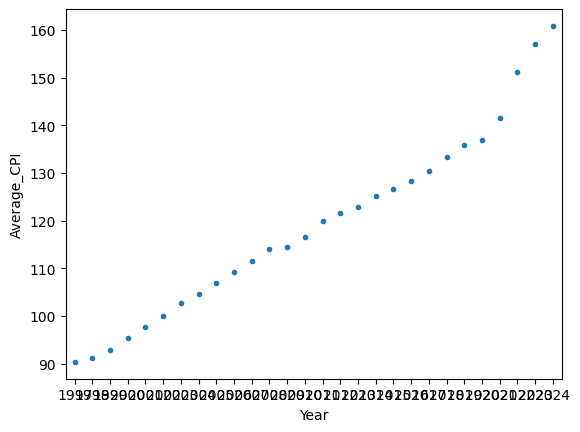

In [59]:
#Determining correlation between year and average CPI
sns.pointplot(data=df,x="Year",y="Average_CPI",linestyles="",markersize=2)
plt.show()

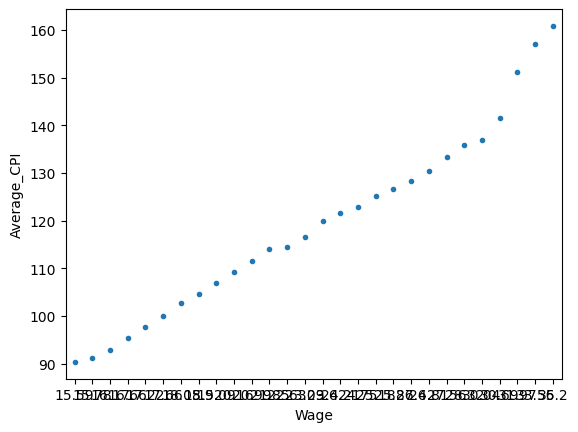

In [58]:
#Determining correlation between Wage and Average CPI
sns.pointplot(data=df, x="Wage", y="Average_CPI", linestyles="", markersize=2)
plt.show()

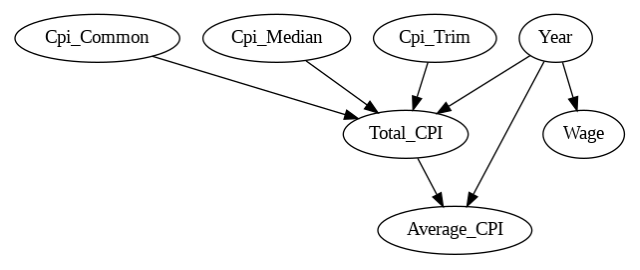

In [21]:
graph = """digraph {Total_CPI -> Average_CPI;
   Year -> Total_CPI;
   Year -> Wage
   Year -> Average_CPI;
   Cpi_Common -> Total_CPI
   Cpi_Median -> Total_CPI
   Cpi_Trim -> Total_CPI ;}"""

model = CausalModel(
    data=df,
    treatment="Year",
    outcome="Average_CPI",
    common_causes="Total_CPI",
    instruments="Wage",
    graph=graph)

model.view_model()

In [13]:
import pandas as pd
from causallearn.search.ConstraintBased import PC
from dowhy import CausalModel
import dowhy.datasets
import numpy as np
import pygraphviz
from IPython.display import Image,display
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('correlation_data1.csv')
labels = [f'{col}' for i, col in enumerate(df.columns)]

df = df.to_numpy()
from causallearn.search.FCMBased import lingam
model = lingam.ICALiNGAM()
model.fit(df)

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


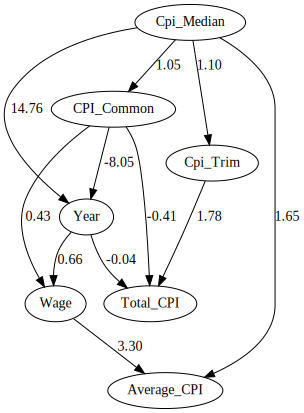

In [15]:
from causallearn.search.FCMBased.lingam.utils import make_dot
make_dot(model.adjacency_matrix_, labels=labels)

/usr/local/lib/python3.11/dist-packages/dowhy/causal_model.py:583: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


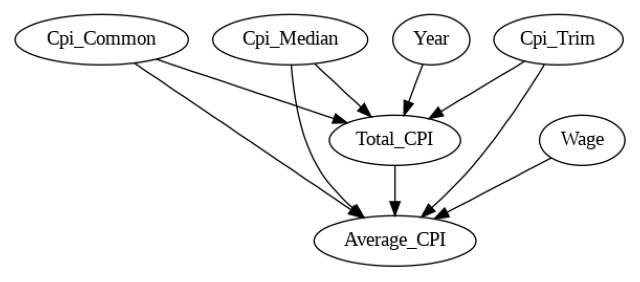

In [46]:
import pandas as pd
from dowhy import CausalModel
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('correlation_data1.csv')

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#Build Directed Graph
model = CausalModel(
    data=df_scaled,
    treatment="Total_CPI",
    outcome="Average_CPI",
    common_causes=["Cpi_Common", "Cpi_Median", "Cpi_Trim"],
    instruments="Year",
    effect_modifiers=["Wage"],
)

model.view_model()

In [47]:
#Identify the casual effect
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                           -1⎤
 ⎢   d                 ⎛   d                ⎞  ⎥
E⎢───────(Average_CPI)⋅⎜───────([Total_CPI])⎟  ⎥
 ⎣d[Year]              ⎝d[Year]             ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Average_CPI then ¬(U →→{Year})
Estimand assumption 2, Exclusion: If we remove {Year}→{Total_CPI}, then ¬({Year}→Average_CPI)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [50]:
#Estimate magnitude of the effect
causal_estimate_iv = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable", method_params = {'iv_instrument_name': 'Year'}) # Changed 'Z0' to 'Year'
print(causal_estimate_iv)
print("Causal Estimate is " + str(causal_estimate_iv.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: iv
Estimand expression:
 ⎡                                           -1⎤
 ⎢   d                 ⎛   d                ⎞  ⎥
E⎢───────(Average_CPI)⋅⎜───────([Total_CPI])⎟  ⎥
 ⎣d[Year]              ⎝d[Year]             ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Average_CPI then ¬(U →→{Year})
Estimand assumption 2, Exclusion: If we remove {Year}→{Total_CPI}, then ¬({Year}→Average_CPI)

## Realized estimand
Realized estimand: Wald Estimator
Realized estimand type: EstimandType.NONPARAMETRIC_ATE
Estimand expression:
 ⎡  d               ⎤
E⎢─────(Average_CPI)⎥
 ⎣dYear             ⎦
─────────────────────
  ⎡  d             ⎤ 
 E⎢─────(Total_CPI)⎥ 
  ⎣dYear           ⎦ 
Estimand assumption 1, As-if-random: If U→→Average_CPI then ¬(U →→{Year})
Estimand assumption 2, Exclusion: If we remove {Year}→{Total_CPI}, then ¬({Year}→Average_CPI)
Estimand assumption 3, treatmen

In [56]:
#Systematic refutation tests
ref = model.refute_estimate(identified_estimand, causal_estimate_iv, method_name="placebo_treatment_refuter", placebo_type="permute") # only permute placebo_type works with IV estimate
print(ref)

Refute: Use a Placebo Treatment
Estimated effect:3.4581188154073947
New effect:107.98834961041452
p value:0.8999999999999999



In [35]:
df = pd.read_csv('correlation_data1.csv')